<H1 style = "color : blue"> Basics of Pandas </H1>

## Table of Content
1. <b>DataFrame Basic:</b>
 - <b>Description: </b>
      - 2-Dimensional, size multable, Tabular data structure with labeled axis(rows and columns)
      - consist of 3 principle components : Rows, Columns and Data.
      <br><br>
 - <b>Syntax of creation of DataFrames: </b>
      - df_name = pd.DataFrame(data)
      - data can be array, iterable, dict or dataframe.
      <br><br>
 - <b>Read from CSV: </b>
      - df_name = pd.read_csv(filename,sep = '',header = None,index_col=0)
          - filename = str, path object or file-like object
          - sep = str, default ','
          - header = int, list of int, default 'infer',None means : column number 
          - index_col = int, str, sequence of int / str, or False, default ``None``
      - data can be array, iterable, dict or dataframe.
      <br><br>
 - <b>Basic Operations: </b>
      - Rename Header:
          - df_name.columns = ['Column1','Column2','Column3']
      - Skip Header :
          - df_name = pd.read_csv(filename,header = None) <return seq no for column>
      - print index :
          - df_name.index
      - Rename index :(by default its 0)
          - df_name.index.name = 'indexname'
      - Delete Index Name :
          - df_name.index.name = None
      - See Columns :
          - df_name.columns
      - Sort by index : 
          - df.sort_index(inplace=True)
    <br><br>

2. <b>Describing Data:</b>
    - <b> Read Data from excel:</b>
        - df_names = pd.read_excel(Path,index_col = 0)
            - Path = path of Excel file
            - index_col = determining index column
    <br><br>  
    - <b> View Data:</b>
        - df_names.head(n):
            - will show first five row by default if no parameter is passed or will show first n row
        - df_names.tail(n):
            - will show last five row by default if no parameter is passed or will show last n row
    <br><br>  
    - <b> Show Table Statistical Information:</b>
        - df_names.describe():
            - show information such as count, mean, std, min, 25%, 50%, 75%, max (by default)
            - Percentile can be change adding parameter such as : df_names.describe(percentiles=[.1, .25, .5, .75, .9])
        - df_names.info():
            - will show detail about the table such as index, column, Null & Non Null Count, Dtype, Memory Usage
      <br><br>    
    - <b> Visualization : </b>
        - df_names[['column1','Column2']].plot(kind = "box",subplot= True)
            - can plot different kind of Plot such as line, bar, barh(bar Horizontal), hist,box,etc
<br><br>        
3. <b>Indexing and Slicing:</b>
    - <b> Column Indexing:</b>
        - Sales.["Sales"] or Sales.[["Sales","Profit"]] (for multiple field type all field in double array)
        - Sales.Sales
    <br><br>  
    - <b> Row Indexing:</b>
        - loc and iloc:
            - df.loc["(index Filter Name)","(Field Name)"]
            - df.loc["(index Filter No)","(Field No)"]
            - The functionalities of iloc and loc are different; iloc fetches the rows/columns at a particular position (and hence takes an integer as input), whereas loc fetches rows/columns with particular labels.
            - Examples 1:
                - sales.loc["Southern Asia"] : will show all the Column info for "Southern Asia"
                - sales.loc["Southern Asia","Sales"] : will Sales Column info for "Southern Asia"
                - sales.iloc[6] : will show all the Column info for "Southern Asia"
                - sales.iloc[6,2] : will Sales Column info for "Southern Asia"
            - Examples 2:(Slicing)
                - sales.loc[:,["Market","Sales","Profit"]]: will show only given 3 column for all dataset
                - sales.iloc[:,[0,3,2]]: will show only given 3 column for all dataset
                - sales.loc[["Western Africa","Southern Africa","North Africa"],:] : will show all column for given indexes only.
                - sales.iloc[0:3,:] : will show all column for given indexes only.
                - sales.loc[["Western Africa","Southern Africa","North Africa"],["Market","Sales","Profit"]] : will show given indexes for given columns
                - sales.iloc[0:3,[0,3,2]]: will show given indexes for given columns
                - sales.iloc[2::2,:]: will give all the even indexes
    <br><br>  
    - <b> Filtering:</b>
        - single Filter : sales[sales["Sales"] > 300000]]
        - Multiple Filter : sales[ (sales["Market"].isin(["LATAM","Europe"]) ) & (sales["Sales"] > 250000)]
            - isin() : Similar to the membership operator in lists, this function can check if the given element "is in" the collection of elements provided. 
            - isna() : It checks whether the given element is null/empty. 
    
    

<h2 style = "color : Brown"> 1. Data Frame </h2>

In [255]:
# All imports
import numpy as np
import pandas as pd

<h4 style = "color : Sky blue"> Example - 1</h4>  

##### Create a Data Frame cars using raw data stored in a dictionary


In [256]:
cars_per_cap = [809, 731, 588, 18, 200, 70, 45]
country = ['United States', 'Australia', 'Japan', 'India', 'Russia', 'Morocco', 'Egypt']
drives_right = [True, False, False, False, True, True, True]

In [257]:
data = {"cars_per_cap":cars_per_cap,"country":country,"drives_right":drives_right}

In [258]:
data

{'cars_per_cap': [809, 731, 588, 18, 200, 70, 45],
 'country': ['United States',
  'Australia',
  'Japan',
  'India',
  'Russia',
  'Morocco',
  'Egypt'],
 'drives_right': [True, False, False, False, True, True, True]}

In [259]:
cars = pd.DataFrame(data)
cars

,cars_per_cap,country,drives_right
0,809,United States,True
1,731,Australia,False
2,588,Japan,False
3,18,India,False
4,200,Russia,True
5,70,Morocco,True
6,45,Egypt,True


In [260]:
help(pd.DataFrame)

Help on class DataFrame in module pandas.core.frame:

class DataFrame(pandas.core.generic.NDFrame)
 |  DataFrame(data=None, index: Union[Collection, NoneType] = None, columns: Union[Collection, NoneType] = None, dtype: Union[str, numpy.dtype, ForwardRef('ExtensionDtype'), NoneType] = None, copy: bool = False)
 |  
 |  Two-dimensional, size-mutable, potentially heterogeneous tabular data.
 |  
 |  Data structure also contains labeled axes (rows and columns).
 |  Arithmetic operations align on both row and column labels. Can be
 |  thought of as a dict-like container for Series objects. The primary
 |  pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, or list-like objects.
 |  
 |      .. versionchanged:: 0.23.0
 |         If data is a dict, column order follows insertion-order for
 |         Python 3.6 and later.
 |  
 |      .. versionchanged:: 0.25.0

In [261]:
type(cars)

pandas.core.frame.DataFrame

<h4 style = "color : Sky blue"> Example - 2 (Reading data from a file)</h4>  

##### Create a Data Frame by importing cars data from cars.csv

In [262]:
# Read a file using pandas
cars_df = pd.read_csv('Data\cars.csv')
cars_df


,USCA,US,United States,809,FALSE
0,ASPAC,AUS,Australia,731.00,True
1,ASPAC,JAP,Japan,588.00,True
2,ASPAC,IN,India,18.00,True
3,ASPAC,RU,Russia,200.00,False
4,LATAM,MOR,Morocco,70.00,False
5,AFR,EG,Egypt,45.00,False
6,EUR,ENG,England,nan,True


<h4 style = "color : Sky blue"> Example - 3 (Column headers)</h4>  

##### Read file - skip header

In [263]:
cars_df = pd.read_csv('Data\cars.csv',header = None)
cars_df

,0,1,2,3,4
0,USCA,US,United States,809.00,False
1,ASPAC,AUS,Australia,731.00,True
2,ASPAC,JAP,Japan,588.00,True
3,ASPAC,IN,India,18.00,True
4,ASPAC,RU,Russia,200.00,False
5,LATAM,MOR,Morocco,70.00,False
6,AFR,EG,Egypt,45.00,False
7,EUR,ENG,England,nan,True


##### Assign Headers

In [264]:
# Returns an array of headers
cars_df.columns



Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [265]:
# Rename Headers
cars_df.columns = ['Country code','region','country','car_per_cap','drive_right']
cars_df

,Country code,region,country,car_per_cap,drive_right
0,USCA,US,United States,809.00,False
1,ASPAC,AUS,Australia,731.00,True
2,ASPAC,JAP,Japan,588.00,True
3,ASPAC,IN,India,18.00,True
4,ASPAC,RU,Russia,200.00,False
5,LATAM,MOR,Morocco,70.00,False
6,AFR,EG,Egypt,45.00,False
7,EUR,ENG,England,nan,True


## Exercise

### Loading a csv in Pandas
Description
Create a dataframe from the file ‘marks.csv’ and print the contents of the dataframe. Open the file from the link above and inspect the required elements in the file (header, separator, etc.). If the top row is a regular entry, do not load it as the column header.

In [266]:
import numpy as np
import pandas as pd

# The file is stored at the following path:
# 'https://media-doselect.s3.amazonaws.com/generic/A08MajL8qN4rq72EpVJbAP1Rw/marks_1.csv'
# Provide your answer below
df = pd.read_csv('https://media-doselect.s3.amazonaws.com/generic/A08MajL8qN4rq72EpVJbAP1Rw/marks_1.csv',sep = '|',header = None)

# Write your answer here
#df.columns = ['Row','Name','Subject','M1','M2','M3']

print(df)

     0        1            2   3   4   5
0    1   Akshay  Mathematics  50  40  80
1    2   Mahima      English  40  33  83
2    3    Vikas  Mathematics  50  42  84
3    4  Abhinav      English  40  31  78
4    5   Mahima      Science  50  40  80
5    6   Akshay      Science  50  49  98
6    7  Abhinav  Mathematics  50  47  94
7    8    Vikas      Science  50  40  80
8    9  Abhinav      Science  50  47  94
9   10    Vikas      English  40  39  98
10  11   Akshay      English  40  35  88
11  12   Mahima  Mathematics  50  43  86




<h4 style = "color : Sky blue"> Example - 4 (Row index/names) </h4>  

##### Read file - skip header and assign first column as index.

In [267]:
# Index is returned by
cars_df.index

RangeIndex(start=0, stop=8, step=1)

In [268]:
# Read file and set 1st column as index
cars_df = pd.read_csv('Data\cars.csv',header = None,index_col = 0)


# set the column names
cars_df.columns = ['region','country','car_per_cap','drive_right']
cars_df

,region,country,car_per_cap,drive_right
0,,,,
USCA,US,United States,809.00,False
ASPAC,AUS,Australia,731.00,True
ASPAC,JAP,Japan,588.00,True
ASPAC,IN,India,18.00,True
ASPAC,RU,Russia,200.00,False
LATAM,MOR,Morocco,70.00,False
AFR,EG,Egypt,45.00,False
EUR,ENG,England,nan,True


In [269]:
# Print the new index
cars_df.index


Index(['USCA', 'ASPAC', 'ASPAC', 'ASPAC', 'ASPAC', 'LATAM', 'AFR', 'EUR'], dtype='object', name=0)

##### Rename the Index Name

In [270]:
cars_df.index.name = 'Country Code'
cars_df

,region,country,car_per_cap,drive_right
Country Code,,,,
USCA,US,United States,809.00,False
ASPAC,AUS,Australia,731.00,True
ASPAC,JAP,Japan,588.00,True
ASPAC,IN,India,18.00,True
ASPAC,RU,Russia,200.00,False
LATAM,MOR,Morocco,70.00,False
AFR,EG,Egypt,45.00,False
EUR,ENG,England,nan,True


##### Delete the index name

In [271]:
cars_df.index.name = None

cars_df

,region,country,car_per_cap,drive_right
USCA,US,United States,809.00,False
ASPAC,AUS,Australia,731.00,True
ASPAC,JAP,Japan,588.00,True
ASPAC,IN,India,18.00,True
ASPAC,RU,Russia,200.00,False
LATAM,MOR,Morocco,70.00,False
AFR,EG,Egypt,45.00,False
EUR,ENG,England,nan,True


##### Set Hierarchical index

In [272]:
# Read file and set 1st column as index
cars_df = pd.read_csv('Data\cars.csv',header = None)

# set the column names
cars_df.columns = ['Country code','region','country','car_per_cap','drive_right']
cars_df.set_index(['region','Country code'], inplace = True)

cars_df

,,country,car_per_cap,drive_right
region,Country code,,,
US,USCA,United States,809.00,False
AUS,ASPAC,Australia,731.00,True
JAP,ASPAC,Japan,588.00,True
IN,ASPAC,India,18.00,True
RU,ASPAC,Russia,200.00,False
MOR,LATAM,Morocco,70.00,False
EG,AFR,Egypt,45.00,False
ENG,EUR,England,nan,True


In [273]:
cars_df.columns

Index(['country', 'car_per_cap', 'drive_right'], dtype='object')

<h4 style = "color : Sky blue"> Example - 5 (Write Data Frame to file) </h4>  

##### Write cars_df to cars_to_csv.csv

In [274]:
cars_df.to_csv('Data\cars_to_csv.csv')

<h4 style = "color : Sky blue"> Question 1 </h4> 

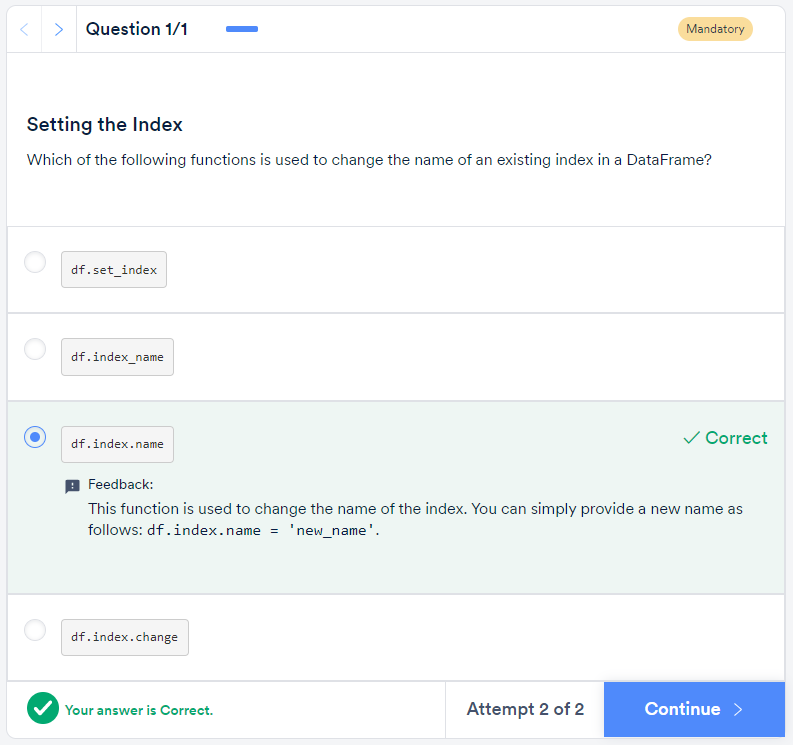

<h4 style = "color : Sky blue">Excercise : </h4>  
<h5>Loading a csv with index
Description
Using the file ‘marks.csv’, create a dataframe as shown below.<br></h5>

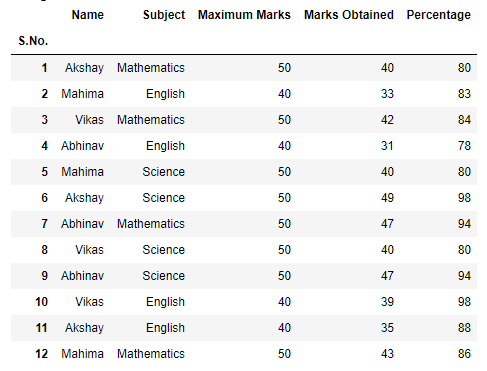

<h5>
You must be able make the first column of the file as the index and name it 'S.No.'. Also, the columns must be renamed as shown in the image.</h5>

In [275]:
import numpy as np
import pandas as pd

# The file is stored at the following path:
# 'https://media-doselect.s3.amazonaws.com/generic/A08MajL8qN4rq72EpVJbAP1Rw/marks_1.csv'
# Provide your answer below
df = pd.read_csv('https://media-doselect.s3.amazonaws.com/generic/A08MajL8qN4rq72EpVJbAP1Rw/marks_1.csv',sep='|',header = None,index_col = 0)

df.columns = ['Name','Subject','Maximum Marks','Marks Obtained','Percentage']

df.index.name = 'S.No.'
print(df)

          Name      Subject  Maximum Marks  Marks Obtained  Percentage
S.No.                                                                 
1       Akshay  Mathematics             50              40          80
2       Mahima      English             40              33          83
3        Vikas  Mathematics             50              42          84
4      Abhinav      English             40              31          78
5       Mahima      Science             50              40          80
6       Akshay      Science             50              49          98
7      Abhinav  Mathematics             50              47          94
8        Vikas      Science             50              40          80
9      Abhinav      Science             50              47          94
10       Vikas      English             40              39          98
11      Akshay      English             40              35          88
12      Mahima  Mathematics             50              43          86


<h2 style = "color : Brown">2. Describing Data </h2>

In [276]:
# All imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### Sales and Profit data is read in dataframe "sales"

In [277]:
# Read file 
sales = pd.read_excel("Data/sales.xlsx")
sales


,Market,Region,No_of_Orders,Profit,Sales
0,Africa,Western Africa,251,"-12,901.51","78,476.06"
1,Africa,Southern Africa,85,"11,768.58","51,319.50"
2,Africa,North Africa,182,"21,643.08","86,698.89"
3,Africa,Eastern Africa,110,"8,013.04","44,182.60"
4,Africa,Central Africa,103,"15,606.30","61,689.99"
5,Asia Pacific,Western Asia,382,"-16,766.90","124,312.24"
6,Asia Pacific,Southern Asia,469,"67,998.76","351,806.60"
7,Asia Pacific,Southeastern Asia,533,"20,948.84","329,751.38"
8,Asia Pacific,Oceania,646,"54,734.02","408,002.98"
9,Asia Pacific,Eastern Asia,414,"72,805.10","315,390.77"


In [278]:
# Read file and set 1st two columns as index
sales = pd.read_excel("Data/sales.xlsx",index_col = [0,1])
sales

No_of_Orders     Profit      Sales
Market       Region                                               
Africa       Western Africa              251 -12,901.51  78,476.06
             Southern Africa              85  11,768.58  51,319.50
             North Africa                182  21,643.08  86,698.89
             Eastern Africa              110   8,013.04  44,182.60
             Central Africa              103  15,606.30  61,689.99
Asia Pacific Western Asia                382 -16,766.90 124,312.24
             Southern Asia               469  67,998.76 351,806.60
             Southeastern Asia           533  20,948.84 329,751.38
             Oceania                     646  54,734.02 408,002.98
             Eastern Asia                414  72,805.10 315,390.77
             Central Asia                 37  -2,649.76   8,190.74
Europe       Western Europe              964  82,091.27 656,637.14
             Southern Europe             338  18,911.49 215,703.93
             Northern Europe             367  43,237.44 252,969.09
             Eastern Europe              241  25,050.69 108,258.93
LATAM        South America               496  12,377.59 210,710.49
             Central America             930  74,679.54 461,670.28
             Caribbean                   288  13,529.59 116,333.05
USCA         Western US                  490  44,303.65 251,991.83
             Southern US                 255  19,991.83 148,771.91
             Eastern US                  443  47,462.04 264,973.98
             Central US                  356  33,697.43 170,416.31
             Canada                       49   7,246.62  26,298.81

<H4 style = "color : Sky blue" >Hierarchical Indexing </H4>

<b>Description:</b><br>
You are provided with the dataset of a company which has offices across three cities - Mumbai, Bangalore and New Delhi. The dataset contains the rating (out of 5) of all the employees from different departments (Finance, HR, Marketing and Sales). 



Create a hierarchical index based on two columns: Office and Department



Print the first 5 rows as the output. Refer to the image below for your reference.

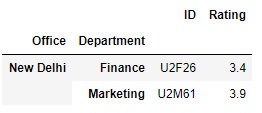





Note: You should not sort or modify values in other columns of the dataframe. Use sort_index(inplace=True) to club the same locations together.

In [279]:
import numpy as np
import pandas as pd

# The file is stored at the following path:
# 'https://media-doselect.s3.amazonaws.com/generic/NMgEjwkAEGGQZBoNYGr9Ld7w0/rating.csv'
df = pd.read_csv('https://media-doselect.s3.amazonaws.com/generic/NMgEjwkAEGGQZBoNYGr9Ld7w0/rating.csv',index_col = [2,1])

# Provide your answer below
df.sort_index(inplace=True)
print(df.head())

                         ID  Rating
Office    Department               
Bangalore Finance     U2F53    2.70
          Finance     U1F53    3.70
          Finance     U1F28    3.20
          Finance     U1F15    3.30
          Finance     U1F14    2.90


<h4 style = "color : Sky blue"> Example - 1</h4>  

##### Display first 3 land last 3 rows of the sales dataframe


In [280]:
sales.head() 
#by default : 5 row

No_of_Orders     Profit     Sales
Market Region                                            
Africa Western Africa            251 -12,901.51 78,476.06
       Southern Africa            85  11,768.58 51,319.50
       North Africa              182  21,643.08 86,698.89
       Eastern Africa            110   8,013.04 44,182.60
       Central Africa            103  15,606.30 61,689.99

In [281]:
sales.head(3)

No_of_Orders     Profit     Sales
Market Region                                            
Africa Western Africa            251 -12,901.51 78,476.06
       Southern Africa            85  11,768.58 51,319.50
       North Africa              182  21,643.08 86,698.89

In [282]:
sales.tail(3)

No_of_Orders    Profit      Sales
Market Region                                       
USCA   Eastern US           443 47,462.04 264,973.98
       Central US           356 33,697.43 170,416.31
       Canada                49  7,246.62  26,298.81

<h4 style = "color : Sky blue"> Example - 2</h4>  

##### Display the information about the data stored in data frame


In [283]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 23 entries, ('Africa', 'Western Africa') to ('USCA', 'Canada')
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   No_of_Orders  23 non-null     int64  
 1   Profit        23 non-null     float64
 2   Sales         23 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 932.0+ bytes


##### Display the statistical information about the data in dataframe

In [284]:
sales.describe()

,No_of_Orders,Profit,Sales
count,23.00,23.00,23.00
mean,366.48,"28,859.94","206,285.11"
std,246.59,"27,701.19","160,589.89"
min,37.00,"-16,766.90","8,190.74"
25%,211.50,"12,073.08","82,587.48"
50%,356.00,"20,948.84","170,416.31"
75%,479.50,"45,882.85","290,182.38"
max,964.00,"82,091.27","656,637.14"


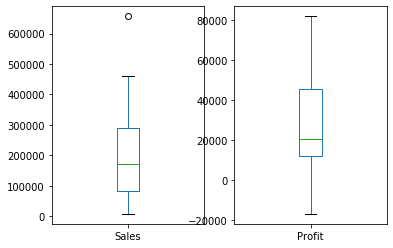

In [285]:
sales[["Sales","Profit"]].plot(kind = "box",subplots = True)
plt.show()

In [286]:
help(df.plot)

Help on PlotAccessor in module pandas.plotting._core object:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data)
 |  
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |      - 'p

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A222DFFB08>,
      dtype=object)

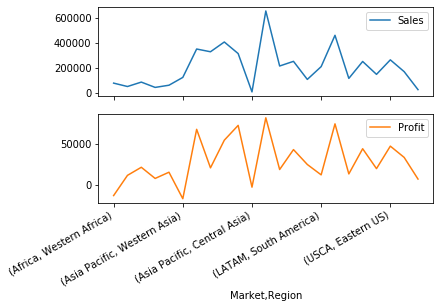

In [287]:
sales[["Sales","Profit"]].plot(kind = "line",subplots = True)

In [288]:
sales["Profit"]

Market        Region           
Africa        Western Africa      -12,901.51
              Southern Africa      11,768.58
              North Africa         21,643.08
              Eastern Africa        8,013.04
              Central Africa       15,606.30
Asia Pacific  Western Asia        -16,766.90
              Southern Asia        67,998.76
              Southeastern Asia    20,948.84
              Oceania              54,734.02
              Eastern Asia         72,805.10
              Central Asia         -2,649.76
Europe        Western Europe       82,091.27
              Southern Europe      18,911.49
              Northern Europe      43,237.44
              Eastern Europe       25,050.69
LATAM         South America        12,377.59
              Central America      74,679.54
              Caribbean            13,529.59
USCA          Western US           44,303.65
              Southern US          19,991.83
              Eastern US           47,462.04
              Central U

<h4 style = "color : Sky blue"> Question 1 </h4> 

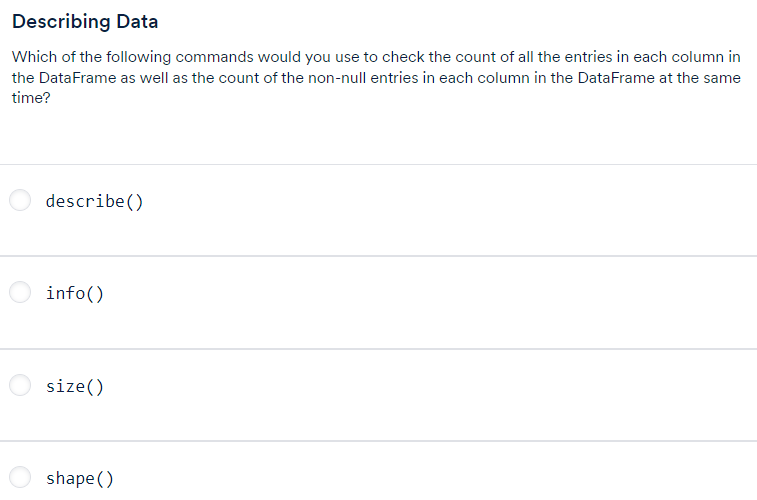

Answer = info()

Feedback:
This is the correct answer. This function shows the range of indices for the count of all the entries in the column and maintains a count of non-null values for each column individually

<h4 style = "color : Sky blue"> DataFrames </h4> 

<b>Description</b><br>
Given a dataframe 'df' use the following commands and analyse the result.<br>
- describe() 
- columns
- shape

In [289]:
import numpy as np
import pandas as pd
df = pd.read_csv('https://media-doselect.s3.amazonaws.com/generic/QRoMGKMEwQJnLYnWWxy79gAo2/forestfires.csv')
#Type your code for describing the dataset
print(df.describe())

#Type your code for printing the columns of the dataset
print(df.columns)

#Type your code for printing the shape of the dataset
print(df.shape)

           X      Y   FFMC    DMC     DC    ISI   temp     RH   wind   rain  \
count 517.00 517.00 517.00 517.00 517.00 517.00 517.00 517.00 517.00 517.00   
mean    4.67   4.30  90.64 110.87 547.94   9.02  18.89  44.29   4.02   0.02   
std     2.31   1.23   5.52  64.05 248.07   4.56   5.81  16.32   1.79   0.30   
min     1.00   2.00  18.70   1.10   7.90   0.00   2.20  15.00   0.40   0.00   
25%     3.00   4.00  90.20  68.60 437.70   6.50  15.50  33.00   2.70   0.00   
50%     4.00   4.00  91.60 108.30 664.20   8.40  19.30  42.00   4.00   0.00   
75%     7.00   5.00  92.90 142.40 713.90  10.80  22.80  53.00   4.90   0.00   
max     9.00   9.00  96.20 291.30 860.60  56.10  33.30 100.00   9.40   6.40   

          area  
count   517.00  
mean     12.85  
std      63.66  
min       0.00  
25%       0.00  
50%       0.52  
75%       6.57  
max   1,090.84  
Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')
(517, 

<h2 style = "color : Brown">3. Indexing and Slicing </h2>

In [290]:
# All imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Displays pandas float values in 2 decimals
pd.options.display.float_format = '{:,.2f}'.format

In [291]:
sales = pd.read_excel('Data\sales.xlsx')
sales

,Market,Region,No_of_Orders,Profit,Sales
0,Africa,Western Africa,251,"-12,901.51","78,476.06"
1,Africa,Southern Africa,85,"11,768.58","51,319.50"
2,Africa,North Africa,182,"21,643.08","86,698.89"
3,Africa,Eastern Africa,110,"8,013.04","44,182.60"
4,Africa,Central Africa,103,"15,606.30","61,689.99"
5,Asia Pacific,Western Asia,382,"-16,766.90","124,312.24"
6,Asia Pacific,Southern Asia,469,"67,998.76","351,806.60"
7,Asia Pacific,Southeastern Asia,533,"20,948.84","329,751.38"
8,Asia Pacific,Oceania,646,"54,734.02","408,002.98"
9,Asia Pacific,Eastern Asia,414,"72,805.10","315,390.77"


##### Sales and Profit data is read in dataframe "sales"

In [292]:
# Read file and set 2nd column as index

sales = pd.read_excel('Data\sales.xlsx',index_col = 1)
sales



,Market,No_of_Orders,Profit,Sales
Region,,,,
Western Africa,Africa,251,"-12,901.51","78,476.06"
Southern Africa,Africa,85,"11,768.58","51,319.50"
North Africa,Africa,182,"21,643.08","86,698.89"
Eastern Africa,Africa,110,"8,013.04","44,182.60"
Central Africa,Africa,103,"15,606.30","61,689.99"
Western Asia,Asia Pacific,382,"-16,766.90","124,312.24"
Southern Asia,Asia Pacific,469,"67,998.76","351,806.60"
Southeastern Asia,Asia Pacific,533,"20,948.84","329,751.38"
Oceania,Asia Pacific,646,"54,734.02","408,002.98"


<h4 style = "color : Sky blue"> Example - 1 (Column Indexing)</h4>  

##### Display Sales Column

In [293]:
sales["Sales"]

Region
Western Africa       78,476.06
Southern Africa      51,319.50
North Africa         86,698.89
Eastern Africa       44,182.60
Central Africa       61,689.99
Western Asia        124,312.24
Southern Asia       351,806.60
Southeastern Asia   329,751.38
Oceania             408,002.98
Eastern Asia        315,390.77
Central Asia          8,190.74
Western Europe      656,637.14
Southern Europe     215,703.93
Northern Europe     252,969.09
Eastern Europe      108,258.93
South America       210,710.49
Central America     461,670.28
Caribbean           116,333.05
Western US          251,991.83
Southern US         148,771.91
Eastern US          264,973.98
Central US          170,416.31
Canada               26,298.81
Name: Sales, dtype: float64

In [294]:
sales.Sales

Region
Western Africa       78,476.06
Southern Africa      51,319.50
North Africa         86,698.89
Eastern Africa       44,182.60
Central Africa       61,689.99
Western Asia        124,312.24
Southern Asia       351,806.60
Southeastern Asia   329,751.38
Oceania             408,002.98
Eastern Asia        315,390.77
Central Asia          8,190.74
Western Europe      656,637.14
Southern Europe     215,703.93
Northern Europe     252,969.09
Eastern Europe      108,258.93
South America       210,710.49
Central America     461,670.28
Caribbean           116,333.05
Western US          251,991.83
Southern US         148,771.91
Eastern US          264,973.98
Central US          170,416.31
Canada               26,298.81
Name: Sales, dtype: float64

In [295]:
type(sales.Sales)

pandas.core.series.Series

<H2 style = "color : Sky Blue"> Selecting Columns of a Dataframe</H2>

<b>Description :</b>
Print out the columns 'month', 'day', 'temp', 'area' from the dataframe 'df'.



In [296]:
import pandas as pd
df = pd.read_csv('https://media-doselect.s3.amazonaws.com/generic/J0k8kkE8wAx32a7Q11j22gynE/forestfires.csv')

#Type your code for selecting columns 'month', 'day' , 'temp' , 'area'
df_2 = df[["month","day","temp","area"]]

print(df_2.head(20))

   month  day  temp  area
0    mar  fri  8.20  0.00
1    oct  tue 18.00  0.00
2    oct  sat 14.60  0.00
3    mar  fri  8.30  0.00
4    mar  sun 11.40  0.00
5    aug  sun 22.20  0.00
6    aug  mon 24.10  0.00
7    aug  mon  8.00  0.00
8    sep  tue 13.10  0.00
9    sep  sat 22.80  0.00
10   sep  sat 17.80  0.00
11   sep  sat 19.30  0.00
12   aug  fri 17.00  0.00
13   sep  mon 21.30  0.00
14   sep  wed 26.40  0.00
15   sep  fri 22.90  0.00
16   mar  sat 15.10  0.00
17   oct  mon 16.70  0.00
18   mar  wed 15.90  0.00
19   apr  sat  9.30  0.00


##### Display Sales and Profit Column together

In [298]:
sales[["Sales","Profit"]]

,Sales,Profit
Region,,
Western Africa,"78,476.06","-12,901.51"
Southern Africa,"51,319.50","11,768.58"
North Africa,"86,698.89","21,643.08"
Eastern Africa,"44,182.60","8,013.04"
Central Africa,"61,689.99","15,606.30"
Western Asia,"124,312.24","-16,766.90"
Southern Asia,"351,806.60","67,998.76"
Southeastern Asia,"329,751.38","20,948.84"
Oceania,"408,002.98","54,734.02"


<h4 style = "color : Sky blue"> Example - 2 (Row Indexing)</h4>  

##### Display data for "Southern Asia"

loc accessor takes row index and column index

In [299]:
help(df.loc)

Help on _LocIndexer in module pandas.core.indexing object:

class _LocIndexer(_LocationIndexer)
 |  Access a group of rows and columns by label(s) or a boolean array.
 |  
 |  ``.loc[]`` is primarily label based, but may also be used with a
 |  boolean array.
 |  
 |  Allowed inputs are:
 |  
 |  - A single label, e.g. ``5`` or ``'a'``, (note that ``5`` is
 |    interpreted as a *label* of the index, and **never** as an
 |    integer position along the index).
 |  - A list or array of labels, e.g. ``['a', 'b', 'c']``.
 |  - A slice object with labels, e.g. ``'a':'f'``.
 |  
 |    .. warning:: Note that contrary to usual python slices, **both** the
 |        start and the stop are included
 |  
 |  - A boolean array of the same length as the axis being sliced,
 |    e.g. ``[True, False, True]``.
 |  - A ``callable`` function with one argument (the calling Series or
 |    DataFrame) and that returns valid output for indexing (one of the above)
 |  
 |  See more at :ref:`Selection by Labe

In [300]:
sales.loc["Southern Asia"]

Market          Asia Pacific
No_of_Orders             469
Profit             67,998.76
Sales             351,806.60
Name: Southern Asia, dtype: object

##### Display Sales data for "Southern Asia"

In [301]:
sales.loc["Southern Asia","Sales"]

351806.6

##### Display data for "Southern Asia"

iloc accessor takes row number and column number

In [302]:
sales.iloc[6]

Market          Asia Pacific
No_of_Orders             469
Profit             67,998.76
Sales             351,806.60
Name: Southern Asia, dtype: object

In [303]:
sales.iloc[6,2]

67998.76

<h4 style = "color : Sky blue"> Example - 3 (Slicing)</h4>  

##### Display data for  Market, Sales and Profit

In [304]:
sales.loc[:,["Market","Sales","Profit"]].head()

#sales[["Market","Sales","Profit"]]

,Market,Sales,Profit
Region,,,
Western Africa,Africa,"78,476.06","-12,901.51"
Southern Africa,Africa,"51,319.50","11,768.58"
North Africa,Africa,"86,698.89","21,643.08"
Eastern Africa,Africa,"44,182.60","8,013.04"
Central Africa,Africa,"61,689.99","15,606.30"


In [305]:
sales.iloc[:,[0,3,2]].head()

,Market,Sales,Profit
Region,,,
Western Africa,Africa,"78,476.06","-12,901.51"
Southern Africa,Africa,"51,319.50","11,768.58"
North Africa,Africa,"86,698.89","21,643.08"
Eastern Africa,Africa,"44,182.60","8,013.04"
Central Africa,Africa,"61,689.99","15,606.30"


##### Display data for Western Africa Southern Africa and North Africa

In [306]:
sales.loc[["Western Africa","Southern Africa","North Africa"],:]

,Market,No_of_Orders,Profit,Sales
Region,,,,
Western Africa,Africa,251,"-12,901.51","78,476.06"
Southern Africa,Africa,85,"11,768.58","51,319.50"
North Africa,Africa,182,"21,643.08","86,698.89"


In [307]:
sales.iloc[0:3,:]

,Market,No_of_Orders,Profit,Sales
Region,,,,
Western Africa,Africa,251,"-12,901.51","78,476.06"
Southern Africa,Africa,85,"11,768.58","51,319.50"
North Africa,Africa,182,"21,643.08","86,698.89"


##### Display Sales and Profit data for Western Africa Southern Africa and North Africa

In [308]:
sales.loc[["Western Africa","Southern Africa","North Africa"],["Market","Sales","Profit"]]

,Market,Sales,Profit
Region,,,
Western Africa,Africa,"78,476.06","-12,901.51"
Southern Africa,Africa,"51,319.50","11,768.58"
North Africa,Africa,"86,698.89","21,643.08"


In [309]:
sales.iloc[0:3,[0,3,2]]

,Market,Sales,Profit
Region,,,
Western Africa,Africa,"78,476.06","-12,901.51"
Southern Africa,Africa,"51,319.50","11,768.58"
North Africa,Africa,"86,698.89","21,643.08"


<H4 style = "color : Sky Blue">Indexing Dataframes</H4>

<b>Description:</b><br>
Print only the even numbers of rows of the dataframe 'df'.

Note: Don't include the row indexed zero.

In [310]:
import pandas as pd
df = pd.read_csv('https://media-doselect.s3.amazonaws.com/generic/wLE4NE7QwqgZn35pd0a9bZBv8/forestfires.csv')
#Type your code here for indexing the dataframe

df_2 = df.iloc[2:-1:2,:]

print(df_2.head(20))

    X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  area
2   7  4   oct  sat 90.60  43.70 686.90  6.70 14.60  33  1.30  0.00  0.00
4   8  6   mar  sun 89.30  51.30 102.20  9.60 11.40  99  1.80  0.00  0.00
6   8  6   aug  mon 92.30  88.90 495.60  8.50 24.10  27  3.10  0.00  0.00
8   8  6   sep  tue 91.00 129.50 692.60  7.00 13.10  63  5.40  0.00  0.00
10  7  5   sep  sat 92.50  88.00 698.60  7.10 17.80  51  7.20  0.00  0.00
12  6  5   aug  fri 63.50  70.80 665.30  0.80 17.00  72  6.70  0.00  0.00
14  6  5   sep  wed 92.90 133.30 699.60  9.20 26.40  21  4.50  0.00  0.00
16  5  5   mar  sat 91.70  35.80  80.80  7.80 15.10  27  5.40  0.00  0.00
18  6  4   mar  wed 89.20  27.90  70.80  6.30 15.90  35  4.00  0.00  0.00
20  6  4   sep  tue 91.00 129.50 692.60  7.00 18.30  40  2.70  0.00  0.00
22  7  4   jun  sun 94.30  96.30 200.00 56.10 21.00  44  4.50  0.00  0.00
24  7  4   aug  sat 93.50 139.40 594.20 20.30 23.70  32  5.80  0.00  0.00
26  7  4   sep  fri 92.40 117.90 668.0

In [311]:
help(df.loc)

Help on _LocIndexer in module pandas.core.indexing object:

class _LocIndexer(_LocationIndexer)
 |  Access a group of rows and columns by label(s) or a boolean array.
 |  
 |  ``.loc[]`` is primarily label based, but may also be used with a
 |  boolean array.
 |  
 |  Allowed inputs are:
 |  
 |  - A single label, e.g. ``5`` or ``'a'``, (note that ``5`` is
 |    interpreted as a *label* of the index, and **never** as an
 |    integer position along the index).
 |  - A list or array of labels, e.g. ``['a', 'b', 'c']``.
 |  - A slice object with labels, e.g. ``'a':'f'``.
 |  
 |    .. warning:: Note that contrary to usual python slices, **both** the
 |        start and the stop are included
 |  
 |  - A boolean array of the same length as the axis being sliced,
 |    e.g. ``[True, False, True]``.
 |  - A ``callable`` function with one argument (the calling Series or
 |    DataFrame) and that returns valid output for indexing (one of the above)
 |  
 |  See more at :ref:`Selection by Labe

<h4 style = "color : Sky blue"> Question 1</h4>  

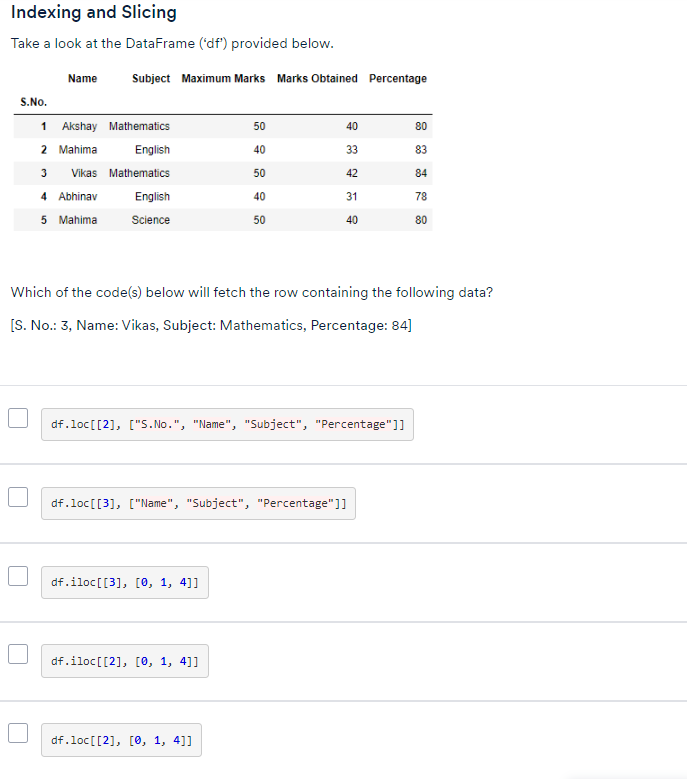

df.loc[[3], ["Name", "Subject", "Percentage"]]<br>
Feedback:The loc function takes input in the form of labels. The specified row has the row label ‘3’ and the columns specified are also correct.

<br>
df.iloc[[2], [0, 1, 4]]<br>
Feedback:The iloc function takes input in the form of position. The specified row is at index ‘2’ (starts at 0) and the columns specified are also correct.

<h4 style = "color : Sky blue"> Question 2</h4>  
What is the difference between the use of iloc and loc?<br>

Answer : The functionalities of iloc and loc are different; iloc fetches the rows/columns at a particular position (and hence takes an integer as input), whereas loc fetches rows/columns with particular labels.



<h4 style = "color : Sky blue"> Example - 4 (Filtering)</h4>  

##### Display Markets with Sales >300000

In [312]:
sales[sales["Sales"] > 300000]

,Market,No_of_Orders,Profit,Sales
Region,,,,
Southern Asia,Asia Pacific,469,"67,998.76","351,806.60"
Southeastern Asia,Asia Pacific,533,"20,948.84","329,751.38"
Oceania,Asia Pacific,646,"54,734.02","408,002.98"
Eastern Asia,Asia Pacific,414,"72,805.10","315,390.77"
Western Europe,Europe,964,"82,091.27","656,637.14"
Central America,LATAM,930,"74,679.54","461,670.28"


##### Display the LATAM and Eruopean countries with sales > 250000

In [313]:
sales[ (sales["Market"].isin(["LATAM","Europe"]) ) & (sales["Sales"] > 250000)]

,Market,No_of_Orders,Profit,Sales
Region,,,,
Western Europe,Europe,964,"82,091.27","656,637.14"
Northern Europe,Europe,367,"43,237.44","252,969.09"
Central America,LATAM,930,"74,679.54","461,670.28"


<H4 style = "color : sky blue"> Applying Conditions on Dataframes</H4><br>
<b>Description :</b><br>
Print all the columns and the rows where 'area' is greater than 0, 'wind' is greater than 1 and the 'temp' is greater than 15.


In [314]:
import pandas as pd
df = pd.read_csv('https://media-doselect.s3.amazonaws.com/generic/xkGKVNE9J4XeMJNEMVOwd1Zx9/forestfires.csv')
df_2 = df[(df["area"] > 0) & (df["wind"] > 1) & (df["temp"] > 15)]
print(df_2.head(20))

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  area
138  9  9   jul  tue 85.80  48.30 313.40  3.90 18.00  42  2.70  0.00  0.36
139  1  4   sep  tue 91.00 129.50 692.60  7.00 21.70  38  2.20  0.00  0.43
140  2  5   sep  mon 90.90 126.50 686.50  7.00 21.90  39  1.80  0.00  0.47
141  1  2   aug  wed 95.50  99.90 513.30 13.20 23.30  31  4.50  0.00  0.55
142  8  6   aug  fri 90.10 108.00 529.80 12.50 21.20  51  8.90  0.00  0.61
143  1  2   jul  sat 90.00  51.30 296.30  8.70 16.60  53  5.40  0.00  0.71
144  2  5   aug  wed 95.50  99.90 513.30 13.20 23.80  32  5.40  0.00  0.77
145  6  5   aug  thu 95.20 131.70 578.80 10.40 27.40  22  4.00  0.00  0.90
147  8  3   sep  tue 84.40  73.40 671.90  3.20 24.20  28  3.60  0.00  0.96
148  2  2   aug  tue 94.80 108.30 647.10 17.00 17.40  43  6.70  0.00  1.07
149  8  6   sep  thu 93.70  80.90 685.20 17.90 23.70  25  4.50  0.00  1.12
150  6  5   jun  fri 92.50  56.40 433.30  7.10 23.20  39  5.40  0.00  1.19
151  9  9   jul  sun 90.1

<h4 style = "color : Sky blue"> Example - 5 (Transformation)</h4>  

##### Replace the sales values in the form of thousands

eg. 300000 - 300K

In [315]:
sales.head()

,Market,No_of_Orders,Profit,Sales
Region,,,,
Western Africa,Africa,251,"-12,901.51","78,476.06"
Southern Africa,Africa,85,"11,768.58","51,319.50"
North Africa,Africa,182,"21,643.08","86,698.89"
Eastern Africa,Africa,110,"8,013.04","44,182.60"
Central Africa,Africa,103,"15,606.30","61,689.99"


In [316]:
sales.Sales = sales.Sales.floordiv(1000)

sales.head()

,Market,No_of_Orders,Profit,Sales
Region,,,,
Western Africa,Africa,251,"-12,901.51",78.00
Southern Africa,Africa,85,"11,768.58",51.00
North Africa,Africa,182,"21,643.08",86.00
Eastern Africa,Africa,110,"8,013.04",44.00
Central Africa,Africa,103,"15,606.30",61.00


In [317]:
sales.rename(columns={'Sales': 'Sales in Thousands'}, inplace=True)
sales.head()

,Market,No_of_Orders,Profit,Sales in Thousands
Region,,,,
Western Africa,Africa,251,"-12,901.51",78.00
Southern Africa,Africa,85,"11,768.58",51.00
North Africa,Africa,182,"21,643.08",86.00
Eastern Africa,Africa,110,"8,013.04",44.00
Central Africa,Africa,103,"15,606.30",61.00


##### Replace values in Profit percent of total

In [318]:
sales.head()

,Market,No_of_Orders,Profit,Sales in Thousands
Region,,,,
Western Africa,Africa,251,"-12,901.51",78.00
Southern Africa,Africa,85,"11,768.58",51.00
North Africa,Africa,182,"21,643.08",86.00
Eastern Africa,Africa,110,"8,013.04",44.00
Central Africa,Africa,103,"15,606.30",61.00


In [319]:
#sales['Profit']
total_sum = sales.Profit.sum()
#total_sum
sales['Profit % of Total'] = sales.Profit.apply(lambda x: x/total_sum*100)

sales.head()

,Market,No_of_Orders,Profit,Sales in Thousands,Profit % of Total
Region,,,,,
Western Africa,Africa,251,"-12,901.51",78.00,-1.94
Southern Africa,Africa,85,"11,768.58",51.00,1.77
North Africa,Africa,182,"21,643.08",86.00,3.26
Eastern Africa,Africa,110,"8,013.04",44.00,1.21
Central Africa,Africa,103,"15,606.30",61.00,2.35


##### Replace negative Profits with NAN

In [320]:
sales.loc[sales['Profit']<0, 'Profit'] = np.nan
sales.head()

,Market,No_of_Orders,Profit,Sales in Thousands,Profit % of Total
Region,,,,,
Western Africa,Africa,251,nan,78.00,-1.94
Southern Africa,Africa,85,"11,768.58",51.00,1.77
North Africa,Africa,182,"21,643.08",86.00,3.26
Eastern Africa,Africa,110,"8,013.04",44.00,1.21
Central Africa,Africa,103,"15,606.30",61.00,2.35


<h4 style = "color : Sky blue"> Example - 6 (Hierarchical Indexing)</h4>  

##### Create Market and Region as multi-index

In [321]:
sales.head()

,Market,No_of_Orders,Profit,Sales in Thousands,Profit % of Total
Region,,,,,
Western Africa,Africa,251,nan,78.00,-1.94
Southern Africa,Africa,85,"11,768.58",51.00,1.77
North Africa,Africa,182,"21,643.08",86.00,3.26
Eastern Africa,Africa,110,"8,013.04",44.00,1.21
Central Africa,Africa,103,"15,606.30",61.00,2.35


In [322]:
sales.reset_index(inplace=True)
sales.head()

,Region,Market,No_of_Orders,Profit,Sales in Thousands,Profit % of Total
0,Western Africa,Africa,251,nan,78.00,-1.94
1,Southern Africa,Africa,85,"11,768.58",51.00,1.77
2,North Africa,Africa,182,"21,643.08",86.00,3.26
3,Eastern Africa,Africa,110,"8,013.04",44.00,1.21
4,Central Africa,Africa,103,"15,606.30",61.00,2.35


In [323]:
sales.set_index(["Market", "Region"], inplace=True)

sales.head(10)

No_of_Orders    Profit  Sales in Thousands  \
Market       Region                                                          
Africa       Western Africa              251       nan               78.00   
             Southern Africa              85 11,768.58               51.00   
             North Africa                182 21,643.08               86.00   
             Eastern Africa              110  8,013.04               44.00   
             Central Africa              103 15,606.30               61.00   
Asia Pacific Western Asia                382       nan              124.00   
             Southern Asia               469 67,998.76              351.00   
             Southeastern Asia           533 20,948.84              329.00   
             Oceania                     646 54,734.02              408.00   
             Eastern Asia                414 72,805.10              315.00   

                                Profit % of Total  
Market       Region                                
Africa       Western Africa                 -1.94  
             Southern Africa                 1.77  
             North Africa                    3.26  
             Eastern Africa                  1.21  
             Central Africa                  2.35  
Asia Pacific Western Asia                   -2.53  
             Southern Asia                  10.24  
             Southeastern Asia               3.16  
             Oceania                         8.25  
             Eastern Asia                   10.97

In [324]:
sales.sort_index()
sales.head(10)

No_of_Orders    Profit  Sales in Thousands  \
Market       Region                                                          
Africa       Western Africa              251       nan               78.00   
             Southern Africa              85 11,768.58               51.00   
             North Africa                182 21,643.08               86.00   
             Eastern Africa              110  8,013.04               44.00   
             Central Africa              103 15,606.30               61.00   
Asia Pacific Western Asia                382       nan              124.00   
             Southern Asia               469 67,998.76              351.00   
             Southeastern Asia           533 20,948.84              329.00   
             Oceania                     646 54,734.02              408.00   
             Eastern Asia                414 72,805.10              315.00   

                                Profit % of Total  
Market       Region                                
Africa       Western Africa                 -1.94  
             Southern Africa                 1.77  
             North Africa                    3.26  
             Eastern Africa                  1.21  
             Central Africa                  2.35  
Asia Pacific Western Asia                   -2.53  
             Southern Asia                  10.24  
             Southeastern Asia               3.16  
             Oceania                         8.25  
             Eastern Asia                   10.97

##### Display Number of orders in African Market

In [325]:
sales.head(10)

No_of_Orders    Profit  Sales in Thousands  \
Market       Region                                                          
Africa       Western Africa              251       nan               78.00   
             Southern Africa              85 11,768.58               51.00   
             North Africa                182 21,643.08               86.00   
             Eastern Africa              110  8,013.04               44.00   
             Central Africa              103 15,606.30               61.00   
Asia Pacific Western Asia                382       nan              124.00   
             Southern Asia               469 67,998.76              351.00   
             Southeastern Asia           533 20,948.84              329.00   
             Oceania                     646 54,734.02              408.00   
             Eastern Asia                414 72,805.10              315.00   

                                Profit % of Total  
Market       Region                                
Africa       Western Africa                 -1.94  
             Southern Africa                 1.77  
             North Africa                    3.26  
             Eastern Africa                  1.21  
             Central Africa                  2.35  
Asia Pacific Western Asia                   -2.53  
             Southern Asia                  10.24  
             Southeastern Asia               3.16  
             Oceania                         8.25  
             Eastern Asia                   10.97

In [326]:
sales.loc[("Africa")]

,No_of_Orders,Profit,Sales in Thousands,Profit % of Total
Region,,,,
Western Africa,251,nan,78.00,-1.94
Southern Africa,85,"11,768.58",51.00,1.77
North Africa,182,"21,643.08",86.00,3.26
Eastern Africa,110,"8,013.04",44.00,1.21
Central Africa,103,"15,606.30",61.00,2.35


In [327]:
sales.loc[("Africa", "Western Africa" )]

No_of_Orders         251.00
Profit                  nan
Sales in Thousands    78.00
Profit % of Total     -1.94
Name: (Africa, Western Africa), dtype: float64

##### Display Sales and % Profit for Africa and Europe

In [328]:
sales.head()

No_of_Orders    Profit  Sales in Thousands  \
Market Region                                                        
Africa Western Africa            251       nan               78.00   
       Southern Africa            85 11,768.58               51.00   
       North Africa              182 21,643.08               86.00   
       Eastern Africa            110  8,013.04               44.00   
       Central Africa            103 15,606.30               61.00   

                        Profit % of Total  
Market Region                              
Africa Western Africa               -1.94  
       Southern Africa               1.77  
       North Africa                  3.26  
       Eastern Africa                1.21  
       Central Africa                2.35

In [329]:
#sales['Profit']
total_sum = sales.Profit.sum()
sales['Profit % of Total'] = sales.Profit.apply(lambda x: x/total_sum*100)

sales.head()

No_of_Orders    Profit  Sales in Thousands  \
Market Region                                                        
Africa Western Africa            251       nan               78.00   
       Southern Africa            85 11,768.58               51.00   
       North Africa              182 21,643.08               86.00   
       Eastern Africa            110  8,013.04               44.00   
       Central Africa            103 15,606.30               61.00   

                        Profit % of Total  
Market Region                              
Africa Western Africa                 nan  
       Southern Africa               1.69  
       North Africa                  3.11  
       Eastern Africa                1.15  
       Central Africa                2.24

In [330]:
sales.loc[["Africa", "Europe"], ["Sales in Thousands", "Profit % of Total"]]

Sales in Thousands  Profit % of Total
Market Region                                                
Africa Western Africa                78.00                nan
       Southern Africa               51.00               1.69
       North Africa                  86.00               3.11
       Eastern Africa                44.00               1.15
       Central Africa                61.00               2.24
Europe Western Europe               656.00              11.79
       Southern Europe              215.00               2.72
       Northern Europe              252.00               6.21
       Eastern Europe               108.00               3.60